# FORD GO BIKE TRIP DATA DETAILED VISUAL EXPLORATION
## by ROBERT KAMAU NJONJO

## Introduction
 
## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
The data set has been stored as a pandas dataframe, It has 16 columns and 183412 rows. The features cover 3 main areas: 
1. trip duration
2. station information
3. member information
### Dataset Dictionary:
1. duration_sec: Trip Duration (seconds)
2. start_time>: Start Time and Date
3. end_time: End Time and Date
4. start_station_id: Start Station ID
5. start_station_name: Start Station Name
6. start_station_latitude: Start Station Latitude
7. start_station_longitude: Start Station Longitude
8. end_station_id: End Station ID
9. end_station_name: End Station Name
10. end_station_latitude: End Station Latitude
11. end_station_longitude: End Station Longitude
12. bike_id: Bike ID
13. user_type: User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
14. member_birth_year: Member Year of Birth
15. member_gender: Member Gender
16. bike_share_for_all_trip: Boolean to track members who are enrolled in the "Bike Share for All" program for low-income residents
## Investigation Overview

> The Goal of this presentation is to explore the main features of bike-sharing in the greater San Francisco Bay area. The main goal here is to specify the main determinants of trip duration by looking at the relationship between trip duration and other explanatory variables in the dataset. We try to answer the following questions:
1. What does the distribution of trip duration look like?
2. Which days have the highest demand on trips?
3. Which hours during the day have the highest demand on trips?
4. How trip duration differs by user age, hour, day, and user type?

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings 
import warnings
warnings.simplefilter("ignore")

####  Loading the dataset and desribing the properties


In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
#create a copy of the data so we can work with the copy and preserve the original
df_copy=df.copy()
df_copy.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
#display the info on the dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
df_copy.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
#define the shape of the dataset
df_copy.shape

(183412, 16)

In [7]:
#check the datatypes occuring in the data
df_copy.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [8]:
#check for duplicated values in the data
df_copy.duplicated().sum()

0

In [9]:
#check for null values in the data
df_copy.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Problems in the data

1. Wrong data types for some elements in the data
2. Missing values in key aspects of the data

#### Correcting Data Types

In [10]:
#convert start_station_id,end_station_id and bike_id into strings
df_copy.start_station_id=df_copy.start_station_id.astype('str')
df_copy.end_station_id=df_copy.end_station_id.astype('str')
df_copy.bike_id=df_copy.bike_id.astype('str')

In [11]:
#convert user_type and member_gender into categories
df_copy.user_type=df_copy.user_type.astype('category')
df_copy.member_gender=df_copy.member_gender.astype('category')

In [12]:
#convert start_time and end_time into datetime
df_copy.start_time=pd.to_datetime(df_copy.start_time)
df_copy.end_time=pd.to_datetime(df_copy.end_time)

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null object
dtypes: category(2), datetime64[ns](2), float64(5), int64(1), obj

#### Filling in the Missing Data

In [14]:
# Percent of missing values in each column
(df_copy.isna().sum() / df_copy.shape[0]) * 100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.000000
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.000000
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

In [15]:
# filling in missing values 
for col in ["start_station_name", "end_station_name", "member_birth_year", "member_gender"]:
    df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])

df_copy["member_gender"] = df_copy["member_gender"].fillna("Male")

In [16]:
# Percent of missing values in each column
(df_copy.isna().sum() / df_copy.shape[0]) * 100

duration_sec               0.0
start_time                 0.0
end_time                   0.0
start_station_id           0.0
start_station_name         0.0
start_station_latitude     0.0
start_station_longitude    0.0
end_station_id             0.0
end_station_name           0.0
end_station_latitude       0.0
end_station_longitude      0.0
bike_id                    0.0
user_type                  0.0
member_birth_year          0.0
member_gender              0.0
bike_share_for_all_trip    0.0
dtype: float64

#### Feature Engineering 

In [17]:
# add new columns for trip duration in minute, hour of the day, day of week and month

df_copy['duration_minute'] = df_copy['duration_sec']/60
df_copy['start_date'] = df_copy.start_time.dt.strftime('%Y-%m-%d')
df_copy['start_hourofday'] = df_copy.start_time.dt.strftime('%H')
df_copy['start_dayofweek'] = df_copy.start_time.dt.strftime('%A')
df_copy['start_month'] = df_copy.start_time.dt.strftime('%B')
df_copy.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,1988.0,Male,No,708.683333,2019-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,29.883333,2019-02-28,23,Thursday,February
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983.0,Female,No,19.116667,2019-02-28,23,Thursday,February
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989.0,Male,No,26.916667,2019-02-28,23,Thursday,February
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988.0,Other,No,26.166667,2019-02-28,23,Thursday,February
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,6488,Subscriber,1992.0,Male,No,17.483333,2019-02-28,23,Thursday,February


In [18]:
# Calculating Age from 'member_birth_year' as of 2019
df_copy['member_age'] = 2019 - df_copy['member_birth_year']
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,1988.0,Male,No,708.683333,2019-02-28,18,Thursday,February,31.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February,45.0


### The structure the dataset:

> The data set has been stored as a pandas dataframe, It has 16 columns and 183412 rows. The features cover 3 main areas: 
1. trip duration
2. station information
3. member information

### The main feature(s) of interest:
> 1. duration_sec
2. duration_minute

### Features that will help support our investigation:
> 1. member_birth_year
2. member_age
3. member_gender
4. bike_share_for_all_trip
5. start_month
6. start_dayofweek
7. user_type

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


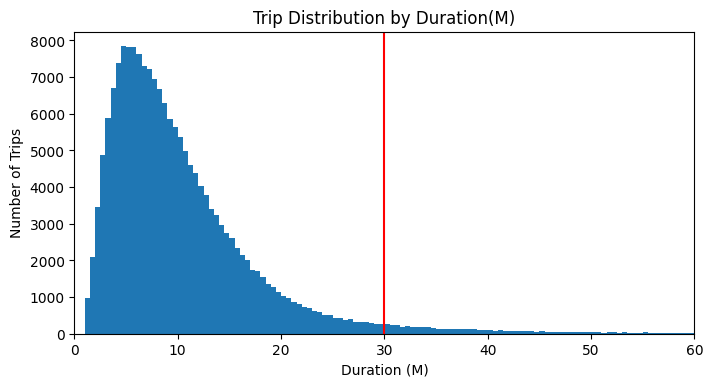

In [19]:
# trip distribution by duration
plt.figure(figsize = (8,4), dpi = 100)
bins=np.arange(0,df_copy['duration_minute'].max()+0.5,0.5)
plt.hist(data = df_copy, x = "duration_minute",bins=bins)
plt.title("Trip Distribution by Duration(M)")
plt.xlabel('Duration (M)')
plt.ylabel('Number of Trips')
plt.axvline(x=30, color = "red")
plt.xlim(0, 60)
plt.show()

In [20]:
len(df_copy[df_copy["duration_minute"] <= 30]) / len(df_copy["duration_minute"]) * 100

96.30994700455805

In [21]:
len(df_copy[df_copy["duration_minute"] > 60]) / len(df_copy["duration_minute"]) * 100

0.9323272195930474

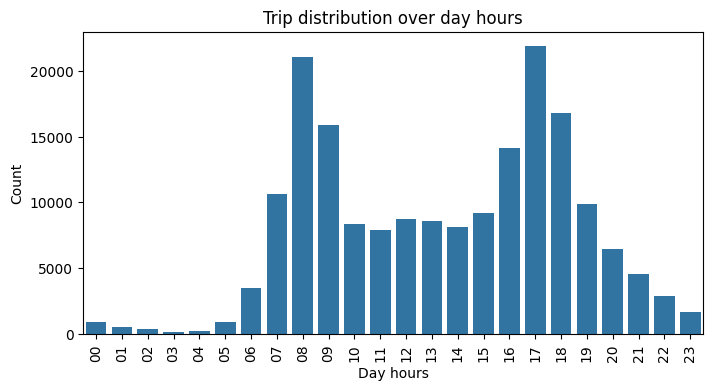

In [22]:
# trip distribution over day hours
plt.figure(figsize = (8,4), dpi = 100)

base_color = sb.color_palette()[0]

hour = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hour_categ = pd.api.types.CategoricalDtype(ordered=True, categories=hour)
df_copy['start_hourofday'] = df_copy['start_hourofday'].astype(hour_categ)


sb.countplot(data = df_copy, x = "start_hourofday", color = base_color)
plt.title("Trip distribution over day hours")
plt.xlabel('Day hours')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

From the distribution of duration we can notice that more than 96 percent of trips were less than 30 minutes. We can also notice that only 0.93 percent of trips are of duration more than 1 hour. These might be considered as outliers that needs to be removed before going further in the bivariate analysis.

From the graph we can notice that peak hours are those from 7 - 9 am and from 4 - 6 pm. This might be related to the time when employees and students go to and leave work and school.And the highest distribution around 5 pm suggesting that most of the individuals find that time to be more convinient. We'll look further into that in the bivariate exploration.

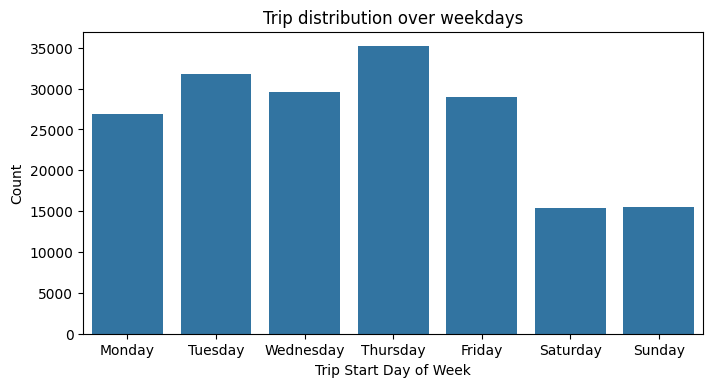

In [23]:
# trip distribution over weekdays
plt.figure(figsize = (8,4), dpi = 100)

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_copy['start_dayofweek'] = df_copy['start_dayofweek'].astype(weekday_categ)

sb.countplot(data=df_copy, x='start_dayofweek', color=base_color)
plt.xlabel('Trip Start Day of Week')
plt.ylabel('Count')
plt.title("Trip distribution over weekdays")

plt.show()

The demand for trips gradually increases untill reaching its highest levels on Thursday, it then declines untill reaching its lowest levels on Saturday and Sunday. This is due to the fact that Saturday and Sunday are the weekend.

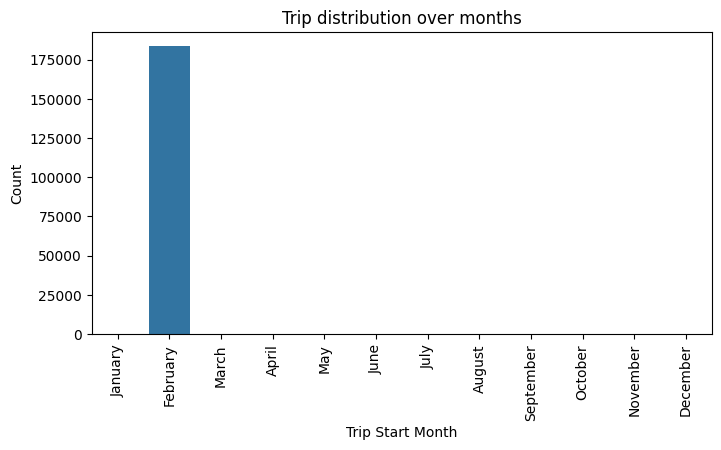

In [24]:
# trip distribution over months
plt.figure(figsize = (8,4), dpi = 100)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_categ = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df_copy['start_month'] = df_copy['start_month'].astype(month_categ)

sb.countplot(data=df_copy, x='start_month', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Trip Start Month')
plt.ylabel('Count')

plt.title("Trip distribution over months")

plt.show()

All trips took place in the month of February.

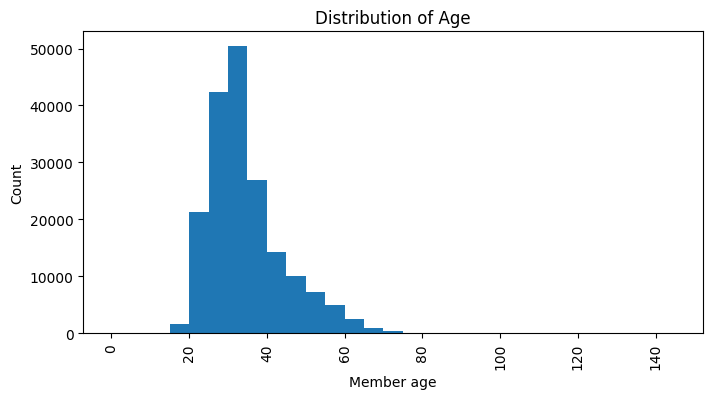

In [25]:
# Distribution of Age
plt.figure(figsize = (8,4), dpi = 100)

bins = np.arange(0, df_copy['member_age'].max()+5, 5)
plt.hist(data=df_copy, x='member_age', color=base_color, bins = bins)
plt.xticks(rotation=90)
plt.xlabel('Member age')
plt.ylabel('Count')

plt.title("Distribution of Age")

plt.show()

In [26]:
len(df_copy[df_copy["member_age"] <= 45]) / len(df_copy["member_age"]) * 100

87.03847076527163

The distribution follows a typical age distribution (Skewed to the right). It is consistent with the distribution of weekdays with those aged 20 - 45 are the most demanding segment for rides as they are the most active population either in work or study.

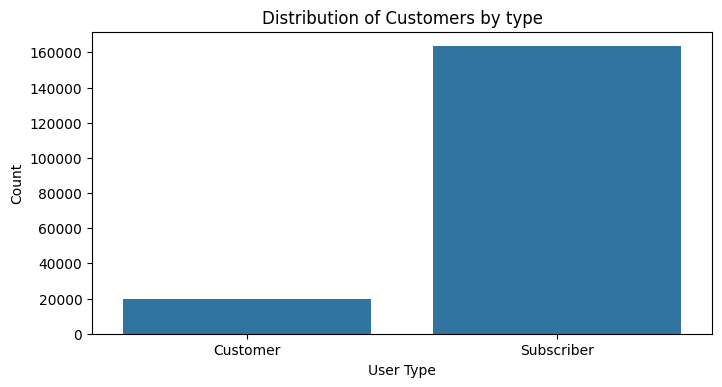

In [27]:
#find the distribution of customers by type
plt.figure(figsize = (8,4), dpi = 100)

plot = sb.countplot(data=df_copy, x='user_type', color=base_color)
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title("Distribution of Customers by type")

plt.show()

Subscriber    89.167557
Customer      10.832443
Name: user_type, dtype: float64


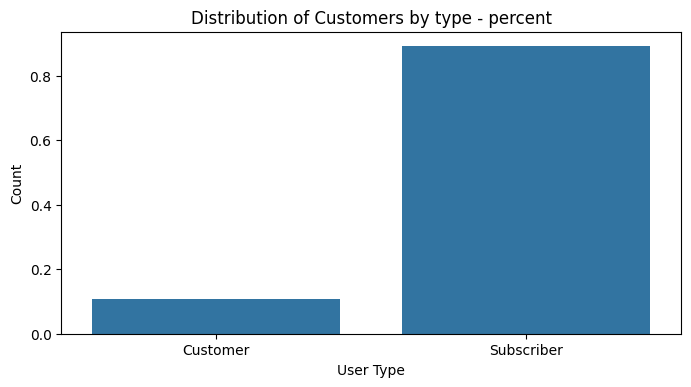

In [28]:
plt.figure(figsize = (8,4), dpi = 100)

counts = df_copy['user_type'].value_counts(normalize = True)
sb.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('User Type')
plt.ylabel('Count')
print(counts * 100)

plt.title("Distribution of Customers by type - percent")
plt.show()

Customers represent 10.8 percent of users, whereas subscribers represents 89.2 percent.

Male      75.739864
Female    22.268990
Other      1.991146
Name: member_gender, dtype: float64


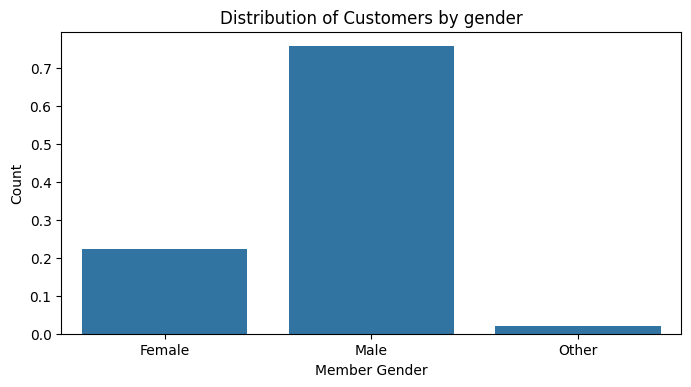

In [29]:
# find the distribution of customers by gender
plt.figure(figsize = (8,4), dpi = 100)

counts = df_copy['member_gender'].value_counts(normalize = True)
sb.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Member Gender')
plt.ylabel('Count')
print(counts * 100)
plt.title("Distribution of Customers by gender")

plt.show()

Removing Outliers

In [30]:
df1 = df_copy[df_copy["duration_minute"] <= 60]
df2 = df1[df_copy["member_age"] <= 80]

df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,member_age
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,29.883333,2019-02-28,23,Thursday,February,60.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983.0,Female,No,19.116667,2019-02-28,23,Thursday,February,36.0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989.0,Male,No,26.916667,2019-02-28,23,Thursday,February,30.0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988.0,Other,No,26.166667,2019-02-28,23,Thursday,February,31.0


In [31]:
df2["duration_minute"].describe()

count    181510.000000
mean         10.398485
std           7.491033
min           1.016667
25%           5.400000
50%           8.516667
75%          13.083333
max          59.933333
Name: duration_minute, dtype: float64

In [32]:
df2["member_age"].describe()

count    181510.000000
mean         33.979781
std           9.674575
min          18.000000
25%          27.000000
50%          31.000000
75%          38.000000
max          80.000000
Name: member_age, dtype: float64

 Males represent 75.7 percent of users, whereas Females represents 22.3 percent, the remainder is others with 1.99 percent

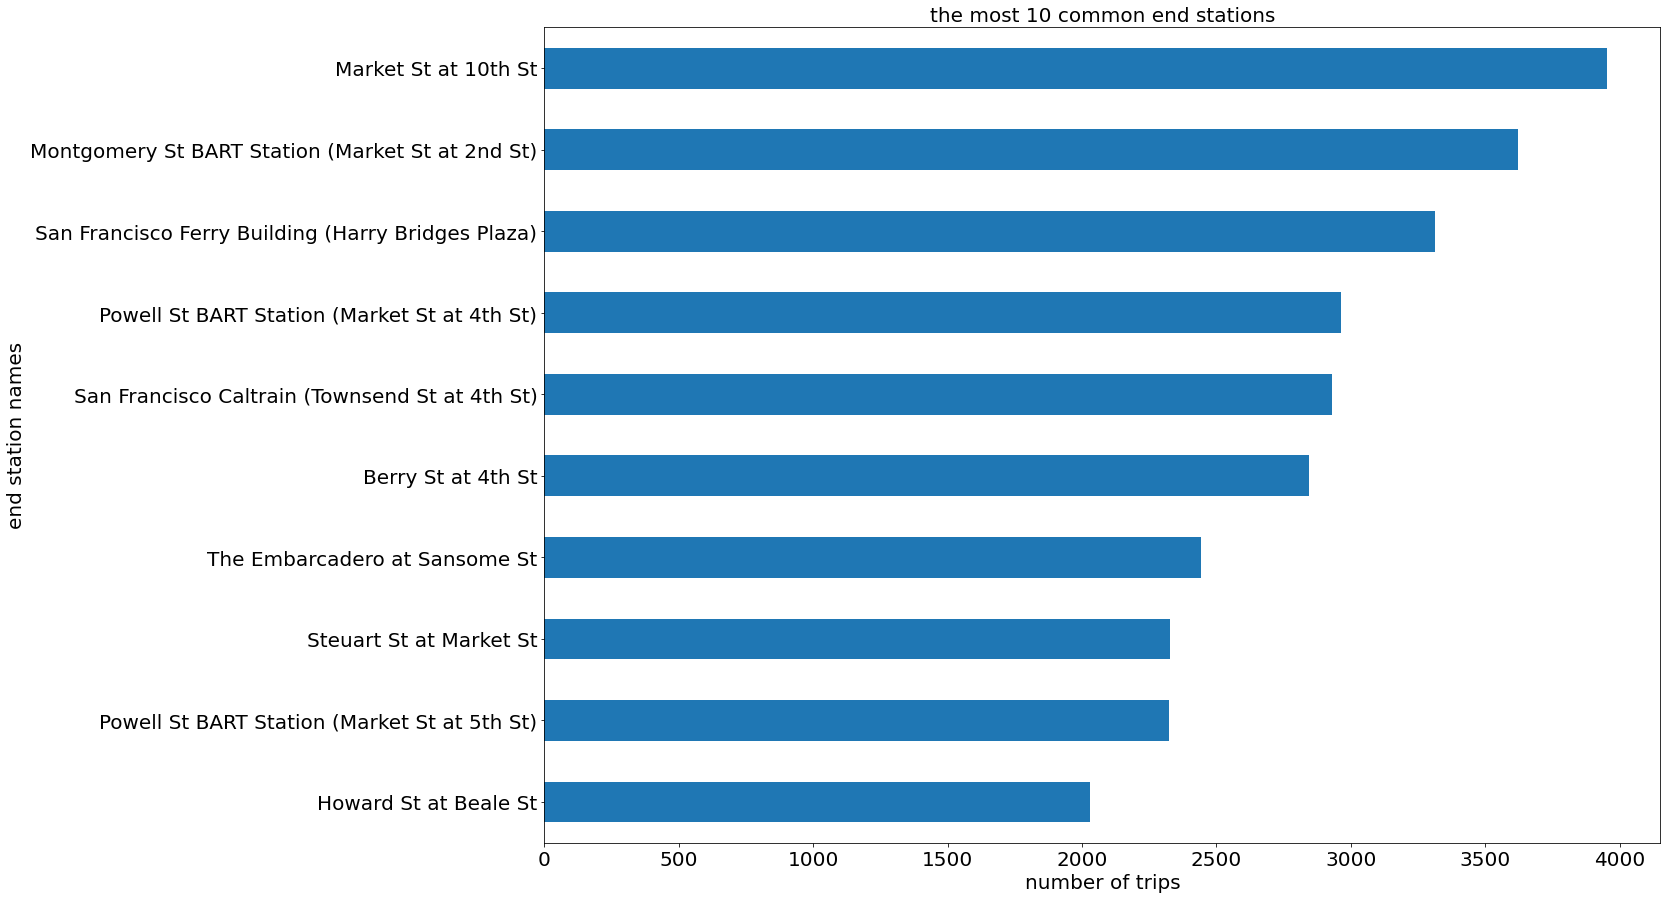

In [33]:
# Bar plot showing the 10 most start stations
df2['end_station_name'].value_counts()[1:11].sort_values().plot(kind='barh',figsize=[20,15],color=sb.color_palette()[0])
plt.ylabel('end station names',fontsize=20)
plt.xlabel('number of trips',fontsize=20)
plt.title('the most 10 common end stations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

### The distribution(s) of variable(s) of interest:

> 1. From the distribution of duration we noticed that more than 96 percent of trips were less than 30 minutes. We also noticed that only 0.93 percent of trips are of duration more than 1 hour. These were considered as outliers and were removed before going further in the bivariate analysis.
2. We also noticed that peak hours are those from 7 - 9 am and from 4 - 6 pm. This might be related to the time when employees and students go to and leave work and school. This is was also consistent with the distribution of trips over weekdays, where work days have the most demand for trips.
3. Age distribution follows any typical age distribution (Skewed to the right). It is consistent with the distribution of weekdays with those aged 20 - 45 are the most demanding segment for rides as they are the most active population either in work or study.
4. Customers represent 10.8 percent of users, whereas subscribers represents 89.2 percent
5. Males represent 75.7 percent of users, whereas Females represents 22.3 percent, the remainder is others with 1.99 percent

### Unusual distributions:

> 1. The distribution of duration was surprising, 96 percent of the trips were 30 minutes or less. There were some outliers that we removed.
2. The Age has also some outliers that we removed.
3. We created new features out of the time variable

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

 #### Duration distribution by member gender

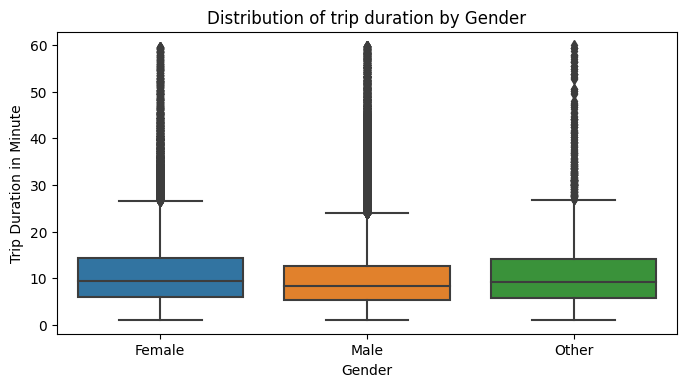

In [34]:
plt.figure(figsize = (8,4), dpi = 100)

sb.boxplot(data = df2, x = "member_gender", y = "duration_minute")
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute')

plt.title("Distribution of trip duration by Gender")

plt.show()

Male riders seem to have shorter trips compared to females other gender gender types, this is evident by smaller median and shorter IQR. However, the difference is very small and we are not sure whether it is significant or not.

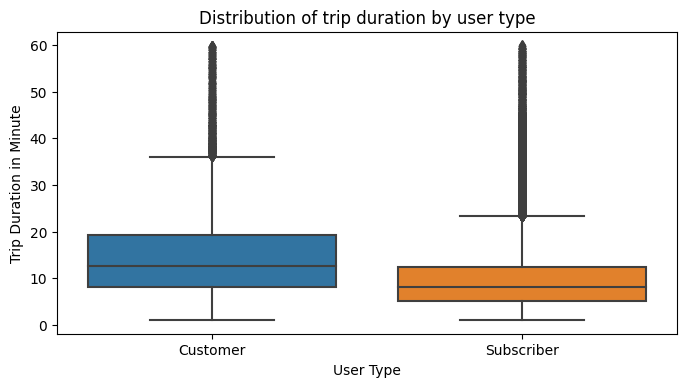

In [35]:
plt.figure(figsize = (8,4), dpi = 100)

sb.boxplot(data = df2, x = "user_type", y = "duration_minute")
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute')

plt.title("Distribution of trip duration by user type")

plt.show()

Subscribers have shorter trips, whearas casual riders (customers) have longer trips. 

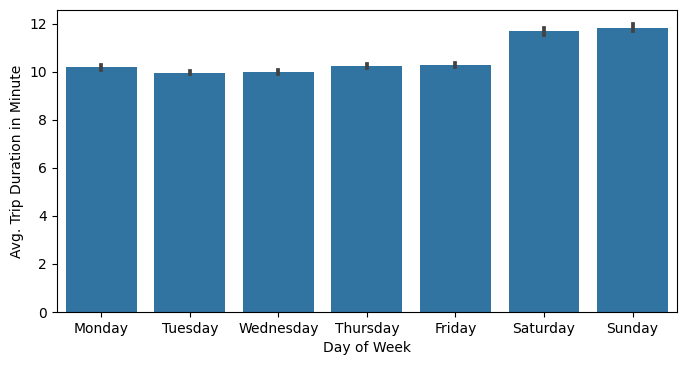

In [36]:
plt.figure(figsize = (8,4), dpi = 100)

sb.barplot(data = df2, x = "start_dayofweek", y = "duration_minute", color=base_color)
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')

plt.show()

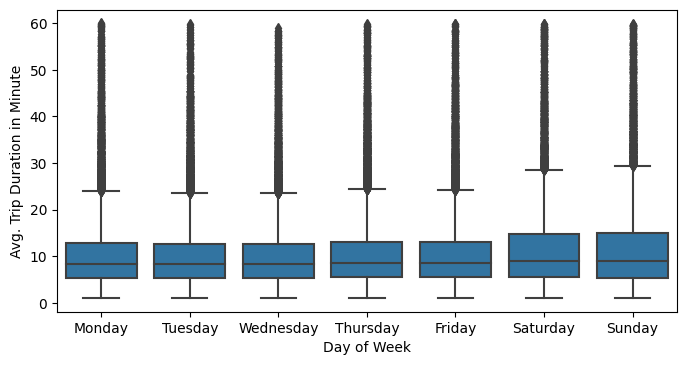

In [37]:
plt.figure(figsize = (8,4), dpi = 100)

sb.boxplot(data = df2, x = "start_dayofweek", y = "duration_minute", color=base_color)
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')

plt.show()

The graphs reflect stable use along work days. Trip duration is longer during weekends, reflecting more casual and entertainment usage.  

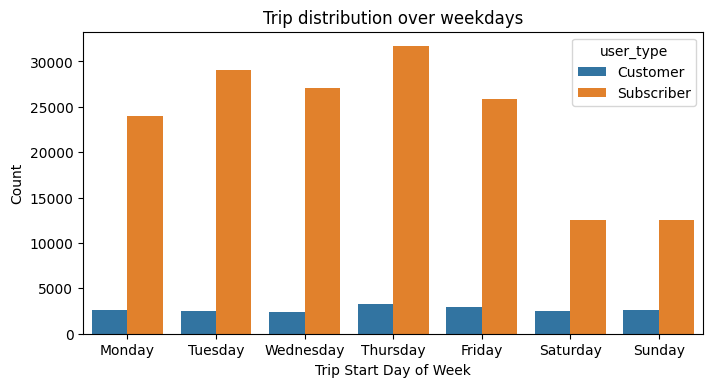

In [38]:
plt.figure(figsize = (8,4), dpi = 100)

sb.countplot(data=df2, x='start_dayofweek', hue='user_type')
plt.xlabel('Trip Start Day of Week')
plt.ylabel('Count')
plt.title("Trip distribution over weekdays")

plt.show()

Subscribers seem to have consistent usage for a specific purpose every day, mainly: work and study. As a result the number of their rides declines the most at weekends.

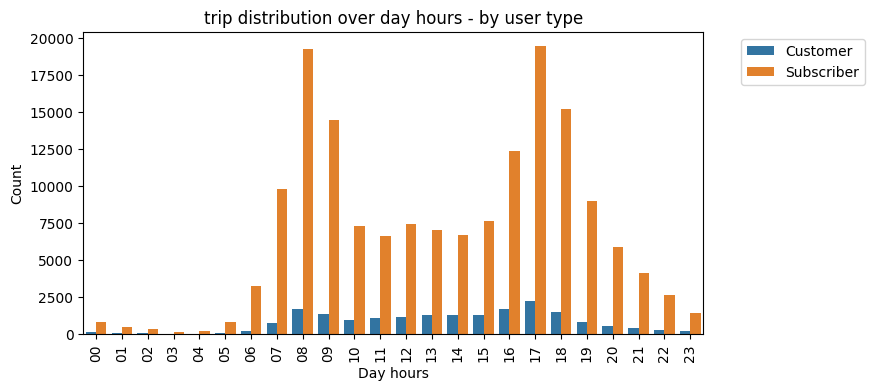

In [39]:
plt.figure(figsize = (8,4), dpi = 100)

sb.countplot(data = df2, x = "start_hourofday", hue='user_type')
plt.title("trip distribution over day hours - by user type")
plt.xlabel('Day hours')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

From the graph we can notice that peak hours for both user types are those from 7 - 9 am and from 4 - 6 pm. This might be related to the time when employees and students go to and leave work and school.

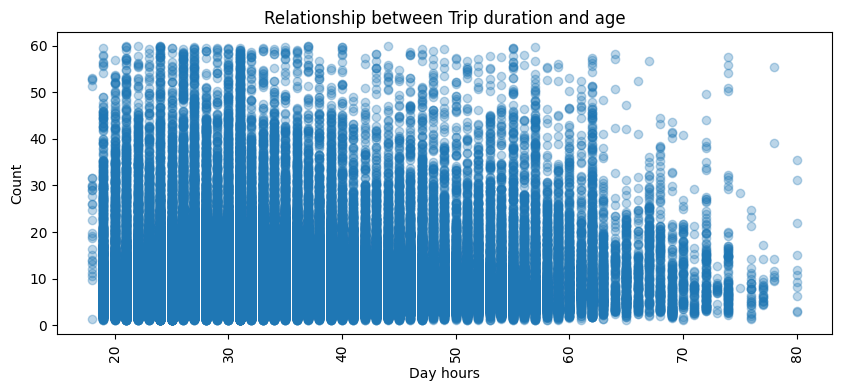

In [40]:
plt.figure(figsize = (10,4), dpi = 100)

plt.scatter(data = df2, x = "member_age", y = "duration_minute", alpha = 0.3)
plt.title("Relationship between Trip duration and age")
plt.xlabel('Day hours')
plt.ylabel('Count')
plt.xticks(rotation = 90)

plt.show()

A clear negative relationship between age and trip duration

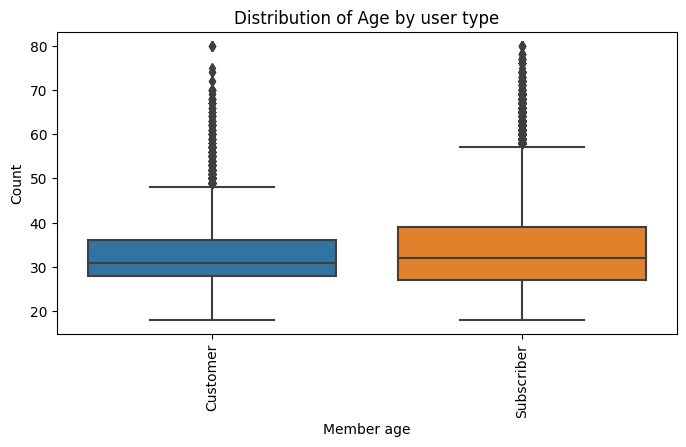

In [41]:
# Distribution of Age
plt.figure(figsize = (8,4), dpi = 100)

sb.boxplot(data=df2, x = "user_type", y='member_age')
plt.xticks(rotation=90)
plt.xlabel('Member age')
plt.ylabel('Count')

plt.title("Distribution of Age by user type")

plt.show()

### Some of the relationships observed in this part of the investigation:

> There are way more subscribers than customers. Subscribers usage seem to be very consistent and standard, their usage is intended for daily routine such as work or study. Therfore subscribers usage reaches its highest levels during rush hours and work days. Customers on the other hand tend to use bikes for fun, their usage is concentrated during weekends at midnights and middays.   

### Interesting relationships between the other features:

> It was surprising to find out customers rides are mostly distributed between midnight and midday

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

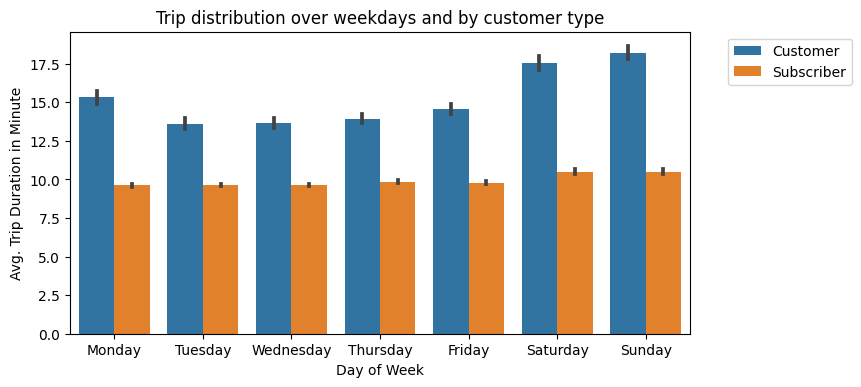

In [42]:
plt.figure(figsize = (8,4), dpi = 100)

sb.barplot(data = df2, x = "start_dayofweek", y = "duration_minute", hue='user_type')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Trip distribution over weekdays and by customer type")

plt.show()

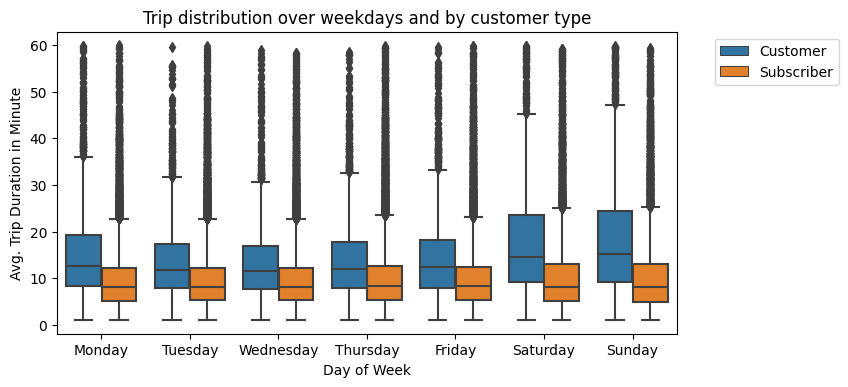

In [43]:
plt.figure(figsize = (8,4), dpi = 100)

sb.boxplot(data = df2, x = "start_dayofweek", y = "duration_minute", hue='user_type')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Trip distribution over weekdays and by customer type")

plt.show()

Customers have consistently longer trips than subscribers

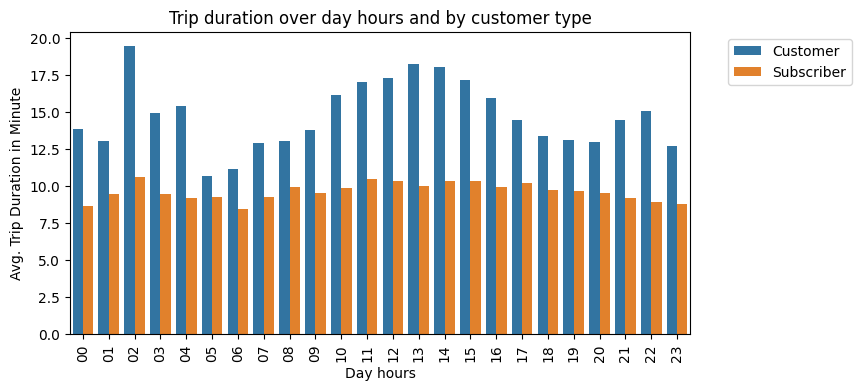

In [44]:
plt.figure(figsize = (8,4), dpi = 100)

sb.barplot(data = df2, x = "start_hourofday", y = "duration_minute",   hue='user_type', ci = None)
plt.title("Trip duration over day hours and by customer type")
plt.xlabel('Day hours')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

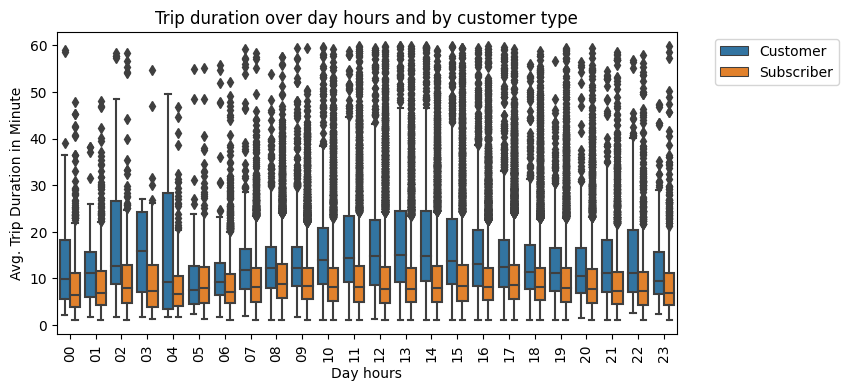

In [45]:
plt.figure(figsize = (8,4), dpi = 100)

sb.boxplot(data = df2, x = "start_hourofday", y = "duration_minute", hue='user_type')
plt.title("Trip duration over day hours and by customer type")
plt.xlabel('Day hours')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Customers have consistently longer trips across all hours of the day. However, customer trips are much longer at midnight and midday

No handles with labels found to put in legend.


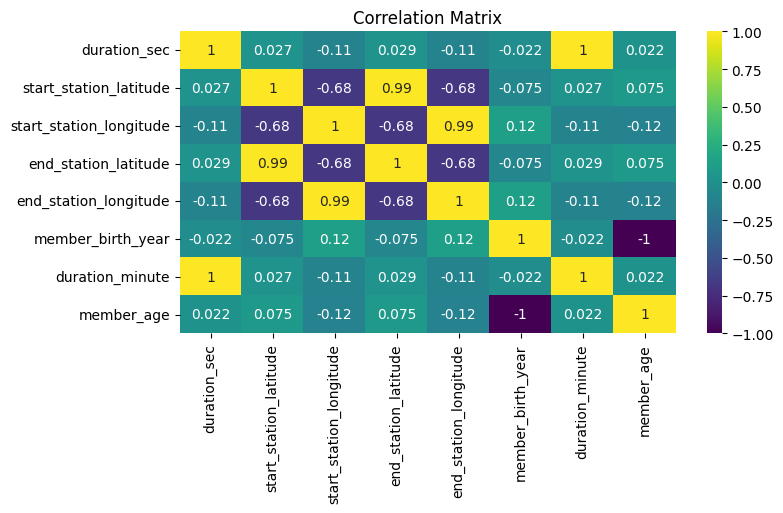

In [46]:
plt.figure(figsize = (8,4), dpi = 100)

sb.heatmap(df2.corr(), cmap = "viridis", annot = True)
plt.title("Correlation Matrix")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

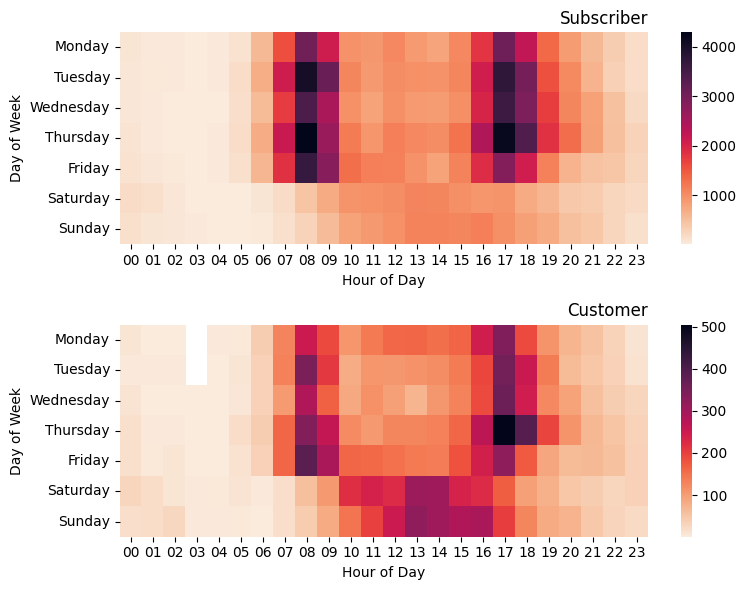

In [47]:
plt.figure(figsize = (8,6), dpi = 100)

plt.subplot(2, 1, 1)
customers = df2[df2['user_type'] == "Subscriber"] 
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
customers = df2[df2['user_type'] == "Customer"] 
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.tight_layout()

There is a clear different usage pattern between customers and subscribers in the way we previously explained

### Some of the relationships you observed in this part of the investigation:
1. More than 90% of the users age below 50 years old and about 78% of users are in the age range from 20 years to 40 years old, so this system is very popular for youth which have a fitness to ride bikes
2. More than 90% of the trips are below 20 minutes.
3. The male users number is more than 3 times of the female users.
5. Most of the users are subscribed in this system (the number of subscribers are more than 9 times greater then those of customers)
6. The number of rides decreases greatly during the weekends (saterday and sunday) compared to the number of rides during the rest of days in the week.
7. The average trip duration during weekends (saturday and sunday) is longer than that during the rest of week the male users have the least trip duration in general , the average trip duration for all genders increased at hte weekend (saterday and sunday) which can be explained that the trips during the weekends are for entertainment where no need to hurry.
8. The subscribers users have the least trip duration in general , the average trip duration for both subscribers and customers increased at the weekend (saterday and sunday) especially the customers which can be explained that the trips during the weekends are for entertainment where no need to hurry

### Interesting or surprising interactions between features:

> It was surprising to see customers rides mostly occur during midnight and midday
